In [36]:
import os
import csv
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

file = "C:\\Users\\hjp28\\Desktop\\Group Project 1\\checkouts_5yr.csv"

publisher_df = pd.read_csv(file)

#publishers["MaterialType"].value_counts()

In [37]:
# Standardizing the data

publisher_std = publisher_df.replace({"Random House,": "Random House, Inc."})
publisher_count = publisher_std["Publisher"].value_counts()


publisher_count.head(10)


Random House, Inc.               378375
Penguin Group (USA), Inc.        270692
HarperCollins Publishers Inc.    237505
Books on Tape                    147939
Blackstone Audio, Inc.           137253
Macmillan Publishers             124034
Simon & Schuster, Inc.           105002
Hachette Digital, Inc.            95845
Tantor Media, Inc                 48401
Thorndike Press,                  41173
Name: Publisher, dtype: int64

In [38]:
# Sum checkouts by publisher

publisher_d2 = publisher_std.groupby(['Publisher'])
funcs = {'Checkouts':'sum'}
publisher_d2 = publisher_d2.agg(funcs)





In [39]:
# List of top 10 publisher by checkouts

short_publisher = publisher_d2.sort_values("Checkouts",ascending = False)
short_publisher

Top_10 = short_publisher.head(10)
Top_10

,Checkouts
Publisher,
"Random House, Inc.",1557597
"Penguin Group (USA), Inc.",739810
HarperCollins Publishers Inc.,717631
Books on Tape,606737
"Blackstone Audio, Inc.",398396
"Hachette Digital, Inc.",360612
Macmillan Publishers,348317
"Simon & Schuster, Inc.",297136
"Alfred A. Knopf,",180564


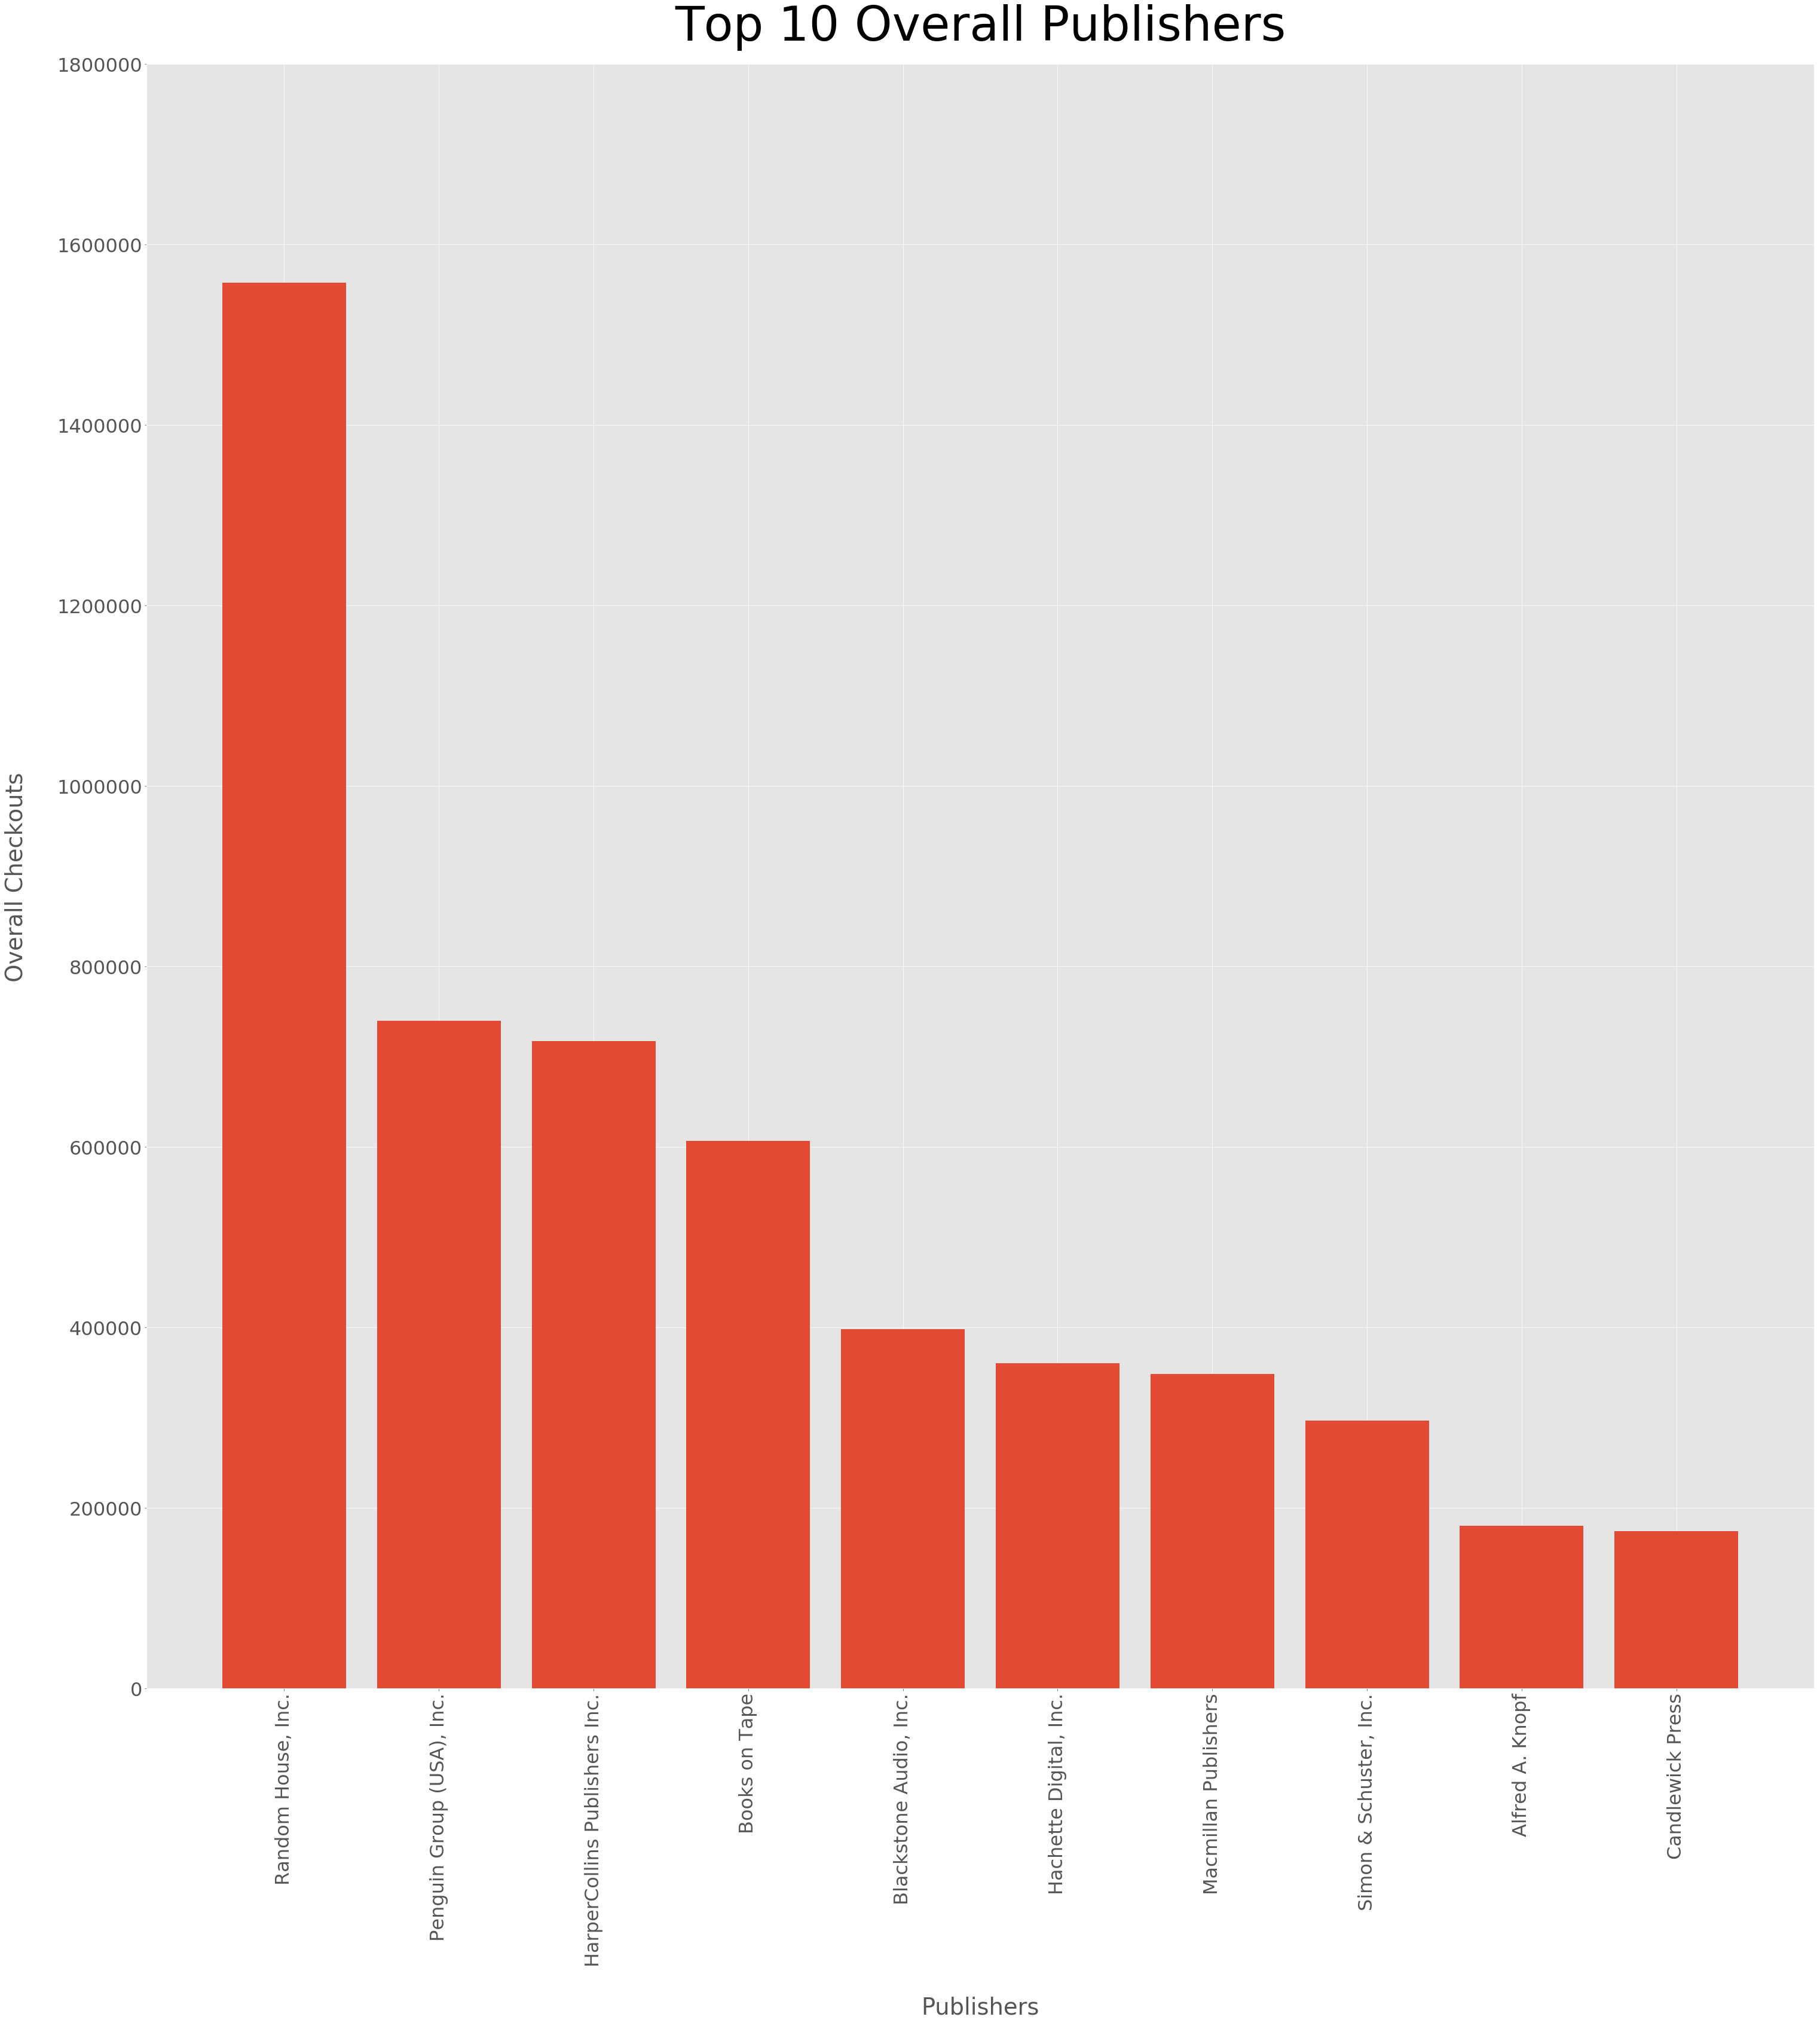

In [47]:
# Making a bar graph

plt.style.use('ggplot')
plt.figure(figsize=(50,50))
plt.rcParams.update({'font.size': 32})

x = ["Random House, Inc.", "Penguin Group (USA), Inc.", "HarperCollins Publishers Inc.", "Books on Tape", "Blackstone Audio, Inc.", "Hachette Digital, Inc.", "Macmillan Publishers", "Simon & Schuster, Inc.", "Alfred A. Knopf", "Candlewick Press"]
checkouts = Top_10.loc[:, "Checkouts"]

plt.bar(np.arange(len(publishers)), checkouts)
plt.yticks(np.arange(0,2000000,step = 200000))
plt.xticks(np.arange(10),x, rotation=90)
plt.xlabel('Publishers', labelpad = 50)
plt.ylabel('Overall Checkouts', labelpad = 50)
plt.title('Top 10 Overall Publishers', fontsize = 80, pad = 40)

fig1 = plt.gcf()
fig1.savefig('toppublishers.png')